In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data=pd.read_csv('D:\Egypt_Houses 2000 rows.csv')

In [5]:
data

,Unnamed: 0,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,0,Penthouse,3000000,3,3,175.0,No,3,Cash,Semi Finished,Stone Residence
1,1,Duplex,8818000,4,4,290.0,Unknown,Ground,Cash or Installment,Semi Finished,Sheikh Zayed
2,2,Apartment,4470000,3,2,155.0,No,2,Installment,Semi Finished,Taj City
3,3,Apartment,492000,3,2,282.0,Unknown,4,Unknown,Unknown,New Cairo - El Tagamoa
4,4,Apartment,1855000,3,3,200.0,No,2,Cash,Core & Shell,Garden Hills
...,...,...,...,...,...,...,...,...,...,...,...
2002,2002,Apartment,3700000,3,2,155.0,No,1,Unknown,Semi Finished,Mountain View iCity
2003,2003,Penthouse,10800000,4,3,243.0,No,5,Cash or Installment,Finished,Village West
2004,2004,Apartment,3442000,3,3,242.0,No,5,Cash or Installment,Unknown,Kenz
2005,2005,Apartment,9500000,3,3,278.0,Unknown,2,Unknown,Unknown,Eastown


In [6]:
data.dtypes

Unnamed: 0          int64
Type               object
Price               int64
Bedrooms            int64
Bathrooms           int64
Area              float64
Furnished          object
Level              object
Payment_Option     object
Delivery_Term      object
City               object
dtype: object

# Data Cleaning

In [7]:
#Drop rows with  missing values
data= data.dropna()

In [8]:
data.isnull().sum()

Unnamed: 0        0
Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              0
Furnished         0
Level             0
Payment_Option    0
Delivery_Term     0
City              0
dtype: int64

In [9]:
# Number of rows (in advance)
print("Current Number of rows", data.shape[0])
# check Rows Duplication
duplicated_rows = sum(data.duplicated())
print("Number of Duplicated rows: ", duplicated_rows)
if(duplicated_rows):
    data.drop_duplicates(keep ='first', inplace=True)
print("New Number of rows after Removing duplication", data.shape[0])

Current Number of rows 2007
Number of Duplicated rows:  0
New Number of rows after Removing duplication 2007


# Exploratory Data Analysis

In [10]:
#show type of data
data.dtypes

Unnamed: 0          int64
Type               object
Price               int64
Bedrooms            int64
Bathrooms           int64
Area              float64
Furnished          object
Level              object
Payment_Option     object
Delivery_Term      object
City               object
dtype: object

# Display all information about columns on the dataset


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2007 non-null   int64  
 1   Type            2007 non-null   object 
 2   Price           2007 non-null   int64  
 3   Bedrooms        2007 non-null   int64  
 4   Bathrooms       2007 non-null   int64  
 5   Area            2007 non-null   float64
 6   Furnished       2007 non-null   object 
 7   Level           2007 non-null   object 
 8   Payment_Option  2007 non-null   object 
 9   Delivery_Term   2007 non-null   object 
 10  City            2007 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.6+ KB


In [12]:
#display descriptive statistics
data.describe()

,Unnamed: 0,Price,Bedrooms,Bathrooms,Area
count,2007.000000,2.007000e+03,2007.000000,2007.000000,2007.000000
mean,1003.000000,3.127291e+06,2.866467,2.285002,169.807524
std,579.515315,3.158103e+06,0.736532,0.851653,63.549235
min,0.000000,1.570000e+05,1.000000,1.000000,0.000000
25%,501.500000,1.000000e+06,3.000000,2.000000,130.000000
50%,1003.000000,2.378000e+06,3.000000,2.000000,160.000000
75%,1504.500000,4.250000e+06,3.000000,3.000000,200.000000
max,2006.000000,5.600000e+07,8.000000,10.000000,550.000000


# Q1: Information about the Distribution of Price and Area

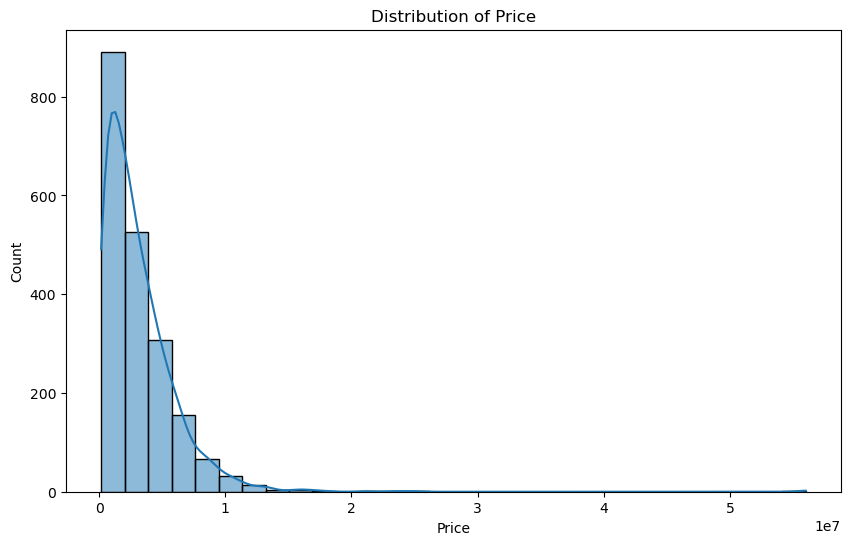

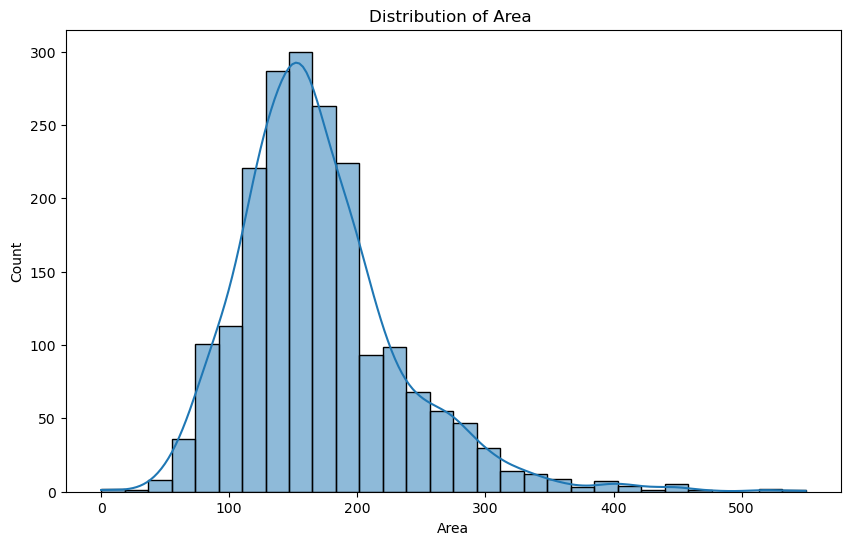

In [13]:
#Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(data['Area'], bins=30, kde=True)
plt.title('Distribution of Area ')
plt.show()

# Q2: Relationship between Area, Price

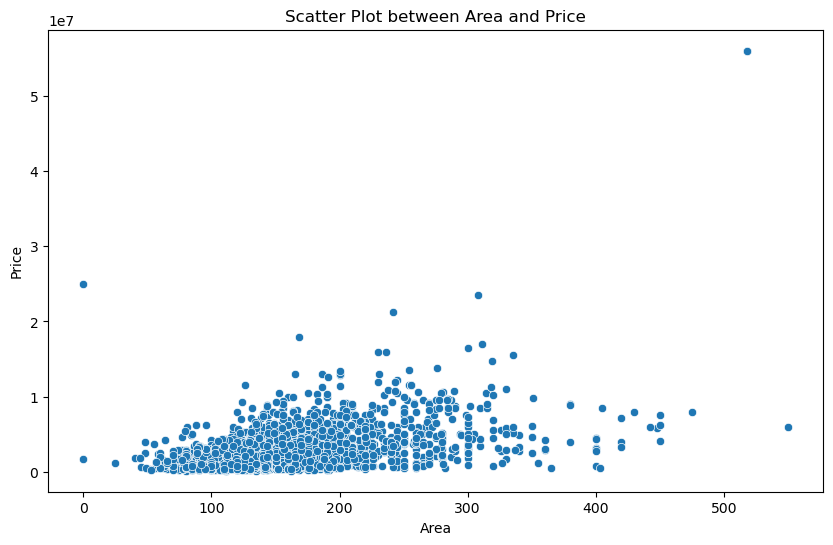

In [14]:
#Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Price', data=data)
plt.title('Scatter Plot between Area and Price')
plt.show()

# Q3: Information about the Price Using box plot

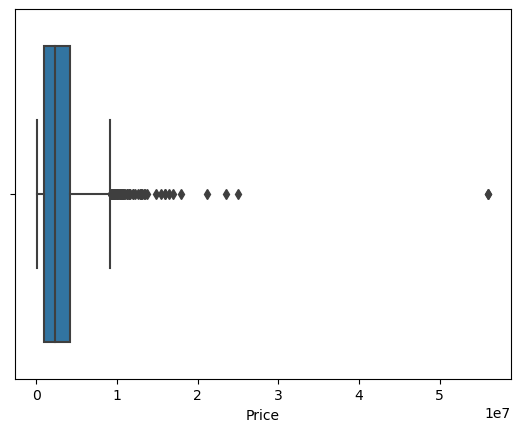

In [15]:
#box plot
sns.boxplot(x='Price', data=data)
plt.show()

# Q4: Information about the avrage of Area and Price

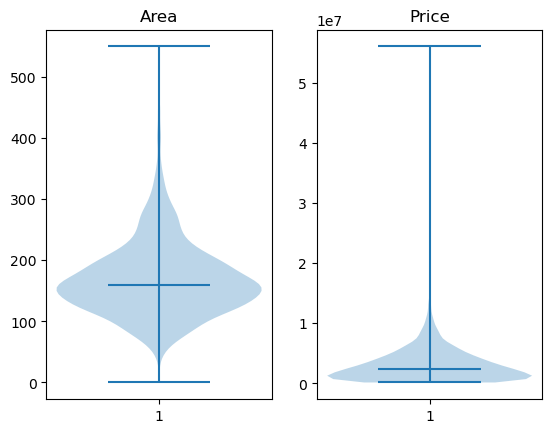

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2);
# Plot violin plot on axes 1
ax1.violinplot(data.Area, showmedians=True)
ax1.set_title('Area')
ax1.set_xticks([1])

# Plot violin plot on axes 2
ax2.violinplot(data.Price, showmedians=True)
ax2.set_title('Price')
ax2.set_xticks([1])
plt.show()

# Q5: Correlation Matrix between Price,Bedrooms,Bathrooms,Area

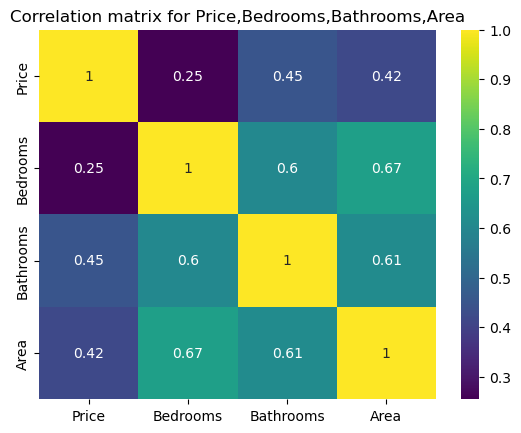

In [19]:
# construct data_ from three columns of the DF (Price,Bedrooms,Bathrooms,Area)
data_ = data[['Price','Bedrooms','Bathrooms','Area']]
correlation_matrix = data_.corr()
#heatmap
sns.heatmap(correlation_matrix, cmap='viridis' , annot = True)
#set title
plt.title("Correlation matrix for Price,Bedrooms,Bathrooms,Area")
# show plot
plt.show()

# Q6: Relationship between every two columns (intiger or flotes)

C:\Users\mesho\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


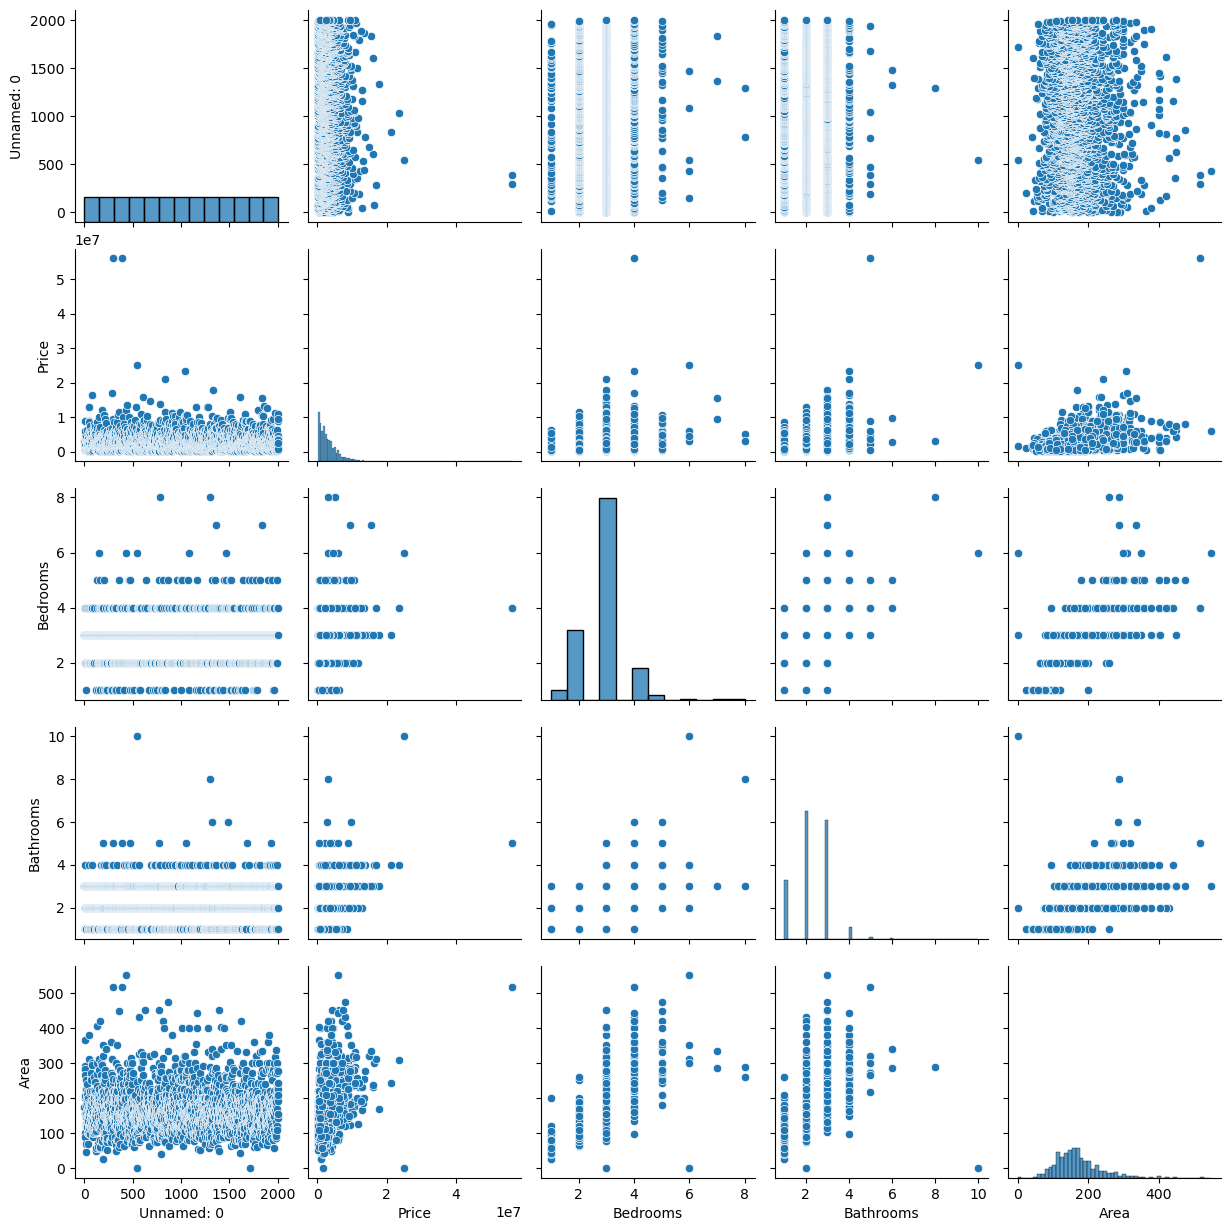

In [21]:
sns.pairplot(data)
plt.show()

# Machine Learning

In [22]:
new_df = data[['Price', 'Area']]
new_df

,Price,Area
0,3000000,175.0
1,8818000,290.0
2,4470000,155.0
3,492000,282.0
4,1855000,200.0
...,...,...
2002,3700000,155.0
2003,10800000,243.0
2004,3442000,242.0
2005,9500000,278.0


<Axes: xlabel='Area', ylabel='Price'>

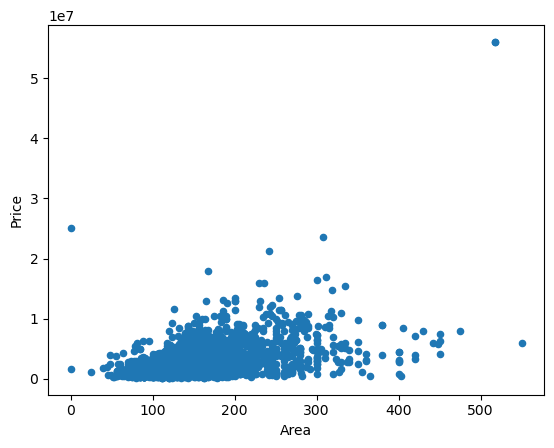

In [23]:
new_df.plot(x='Area', y='Price', kind='scatter')

In [24]:
x = new_df['Area']
y = new_df['Price']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [27]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (1605,)
X_test: (402,)
Y_train: (1605,)
Y_test: (402,)


In [28]:
model = LinearRegression()

In [29]:
model.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression()

In [30]:
model.coef_

array([21608.2294464])

In [31]:
model.intercept_

-579941.3146016006

In [32]:
y_pred = model.predict(x_test.values.reshape(-1,1))
y_pred

array([3417581.13298199, 2445210.80789409, 3158282.37962522,
       2661293.10235807, 1926613.30118054,  392429.0104863 ,
       3374364.6740892 , 2142695.59564452, 3482405.82132119,
        716552.45218227, 3093457.69128603, 2099479.13675173,
       3957786.86914194, 3741704.57467796, 3374364.6740892 ,
       4606033.75253387, 2834158.93792925, 2661293.10235807,
       4670858.44087306, 4908548.96478344, 1796963.92450216,
       3201498.83851801, 6334692.1082457 , 3309539.98575   ,
       4994981.88256903, 3914570.41024914,  932634.74664625,
       2229128.51343011, 5211064.17703301, 2445210.80789409,
       3115065.92073242, 2013046.21896614, 6982938.99163763,
       4065828.01637393, 3741704.57467796, 1170325.27055662,
       1580881.63003818, 5362321.78315779, 2661293.10235807,
       1429624.02391339, 1472840.48280619, 3201498.83851801,
       1105500.58221743, 2985416.54405404, 3417581.13298199,
       3093457.69128603, 3309539.98575   , 2553251.95512608,
       2013046.21896614,

In [33]:
y_test

927     6567500
294     4968179
713     3300000
252      350000
1729     900000
         ...   
1454    1420000
1792     420000
692     1152000
360     5800000
1817    2250000
Name: Price, Length: 402, dtype: int64

In [34]:
x_test

927     185.0
294     140.0
713     173.0
252     150.0
1729    116.0
        ...  
1454    130.0
1792    120.0
692     200.0
360     448.0
1817    139.0
Name: Area, Length: 402, dtype: float64